# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

**Sumber Dataset** : AI Developer Productivity Dataset ([Kaggle](https://www.kaggle.com/datasets/atharvasoundankar/ai-developer-productivity-dataset))

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
!kaggle datasets download -d atharvasoundankar/ai-developer-productivity-dataset

Dataset URL: https://www.kaggle.com/datasets/atharvasoundankar/ai-developer-productivity-dataset
License(s): apache-2.0


In [3]:
!unzip "ai-developer-productivity-dataset.zip"

Archive:  ai-developer-productivity-dataset.zip
  inflating: ai_dev_productivity.csv  


In [5]:
data = pd.read_csv('ai_dev_productivity.csv')
data

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1
...,...,...,...,...,...,...,...,...,...
495,6.08,594,1,5.3,3,0,0.91,6.8,1
496,2.93,382,2,6.7,3,2,1.38,5.9,0
497,4.62,494,4,7.5,2,0,0.41,4.5,1
498,3.25,296,6,6.9,1,0,1.52,6.3,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
data.describe()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


In [8]:
data.isnull().sum()

hours_coding        0
coffee_intake_mg    0
distractions        0
sleep_hours         0
commits             0
bugs_reported       0
ai_usage_hours      0
cognitive_load      0
task_success        0
dtype: int64

In [9]:
data.duplicated().sum()

0

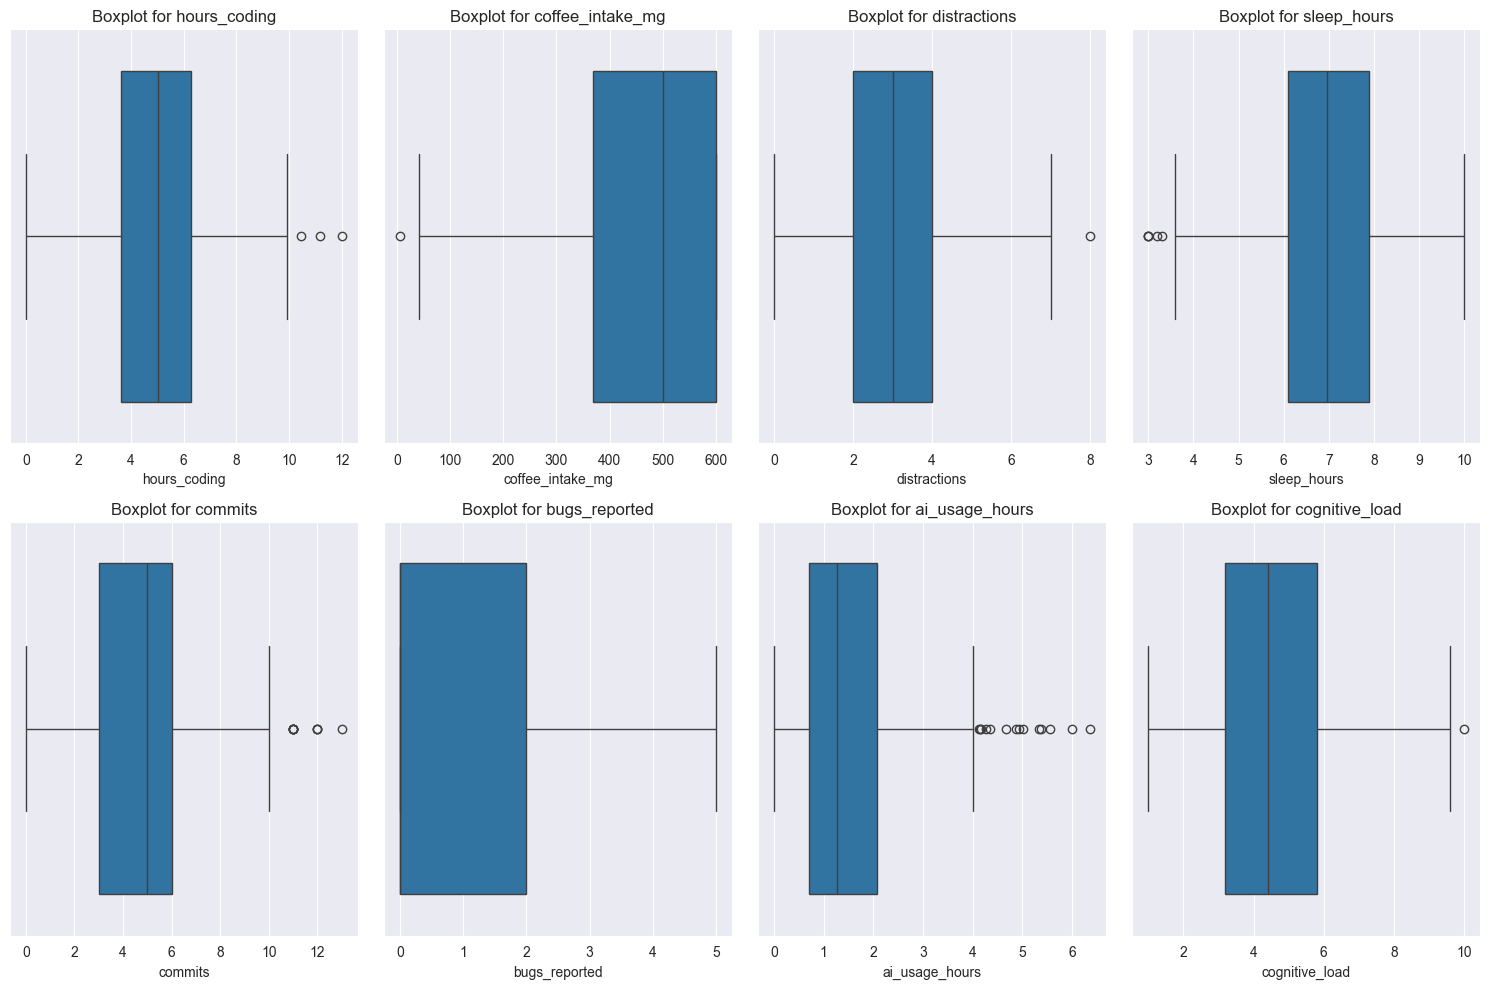

In [12]:
rows = 2
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

for ax, col in zip(axes.flatten(), data.columns):
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(f'Boxplot for {col}')

for i in range(len(data.columns), rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

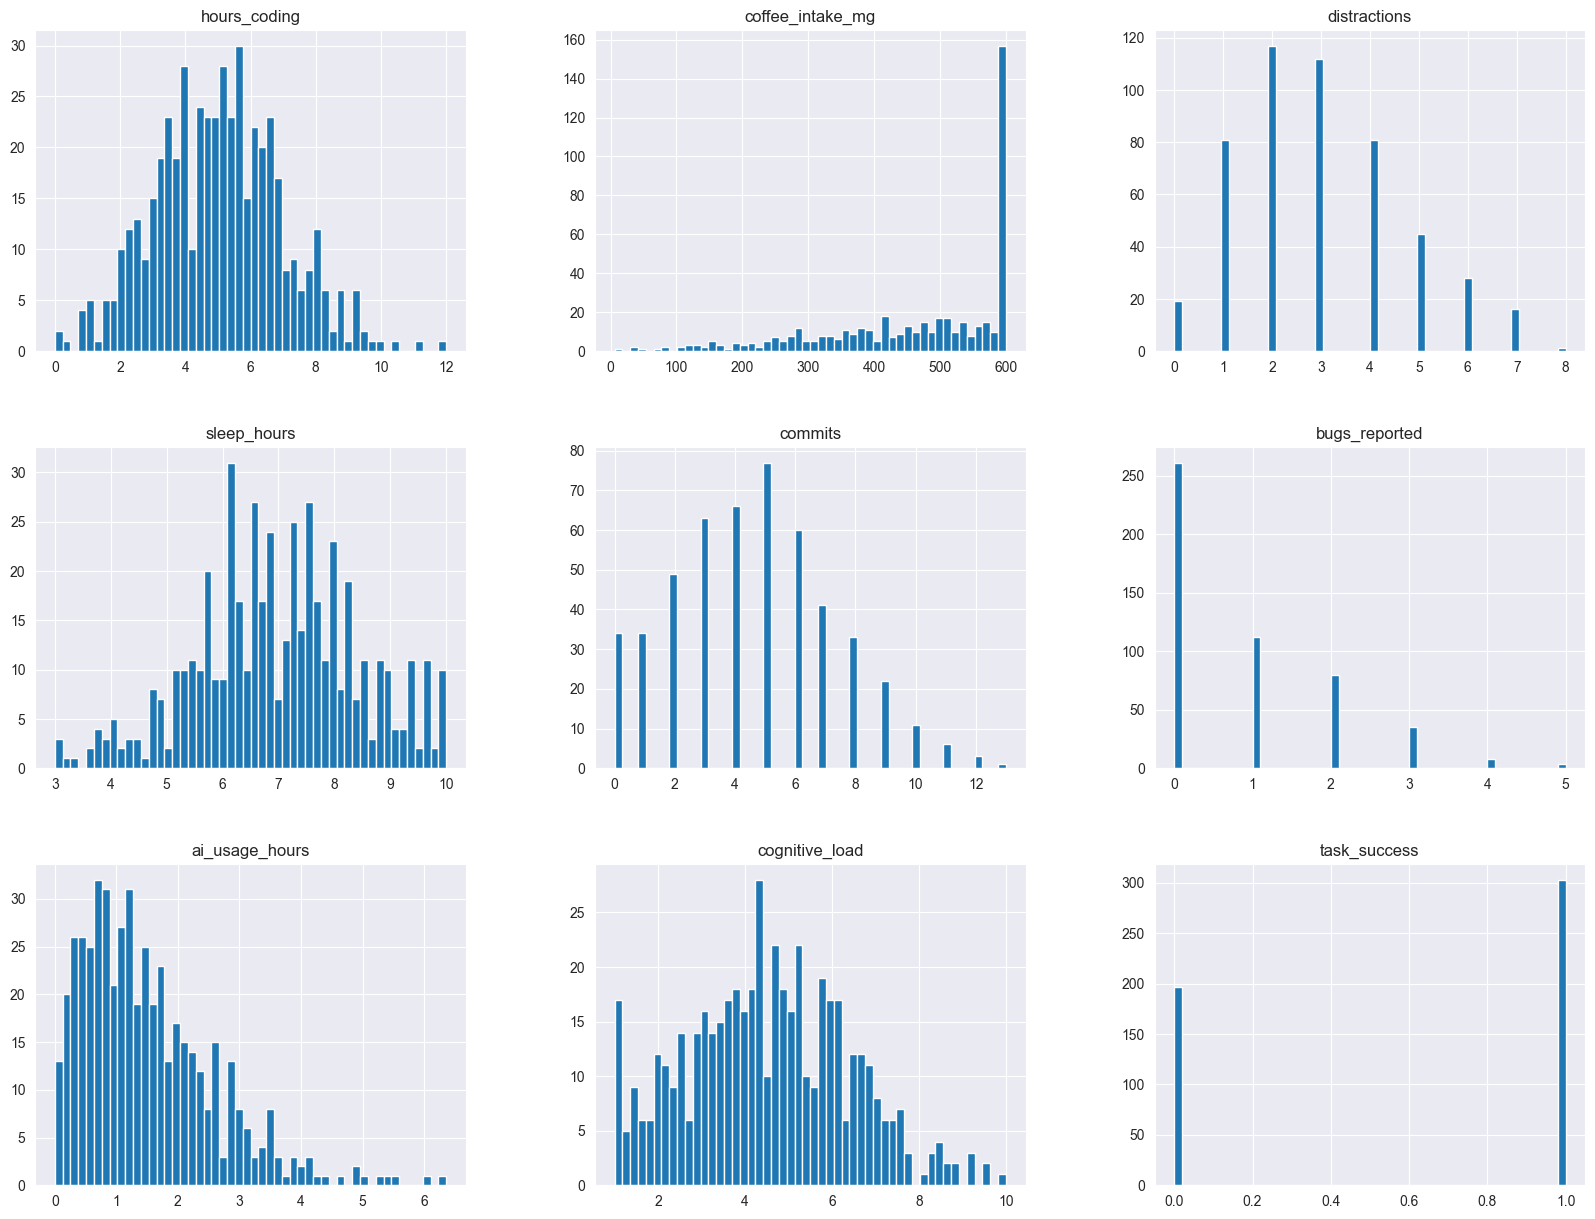

In [13]:
data.hist(bins=50, figsize=(20,15))
plt.show()

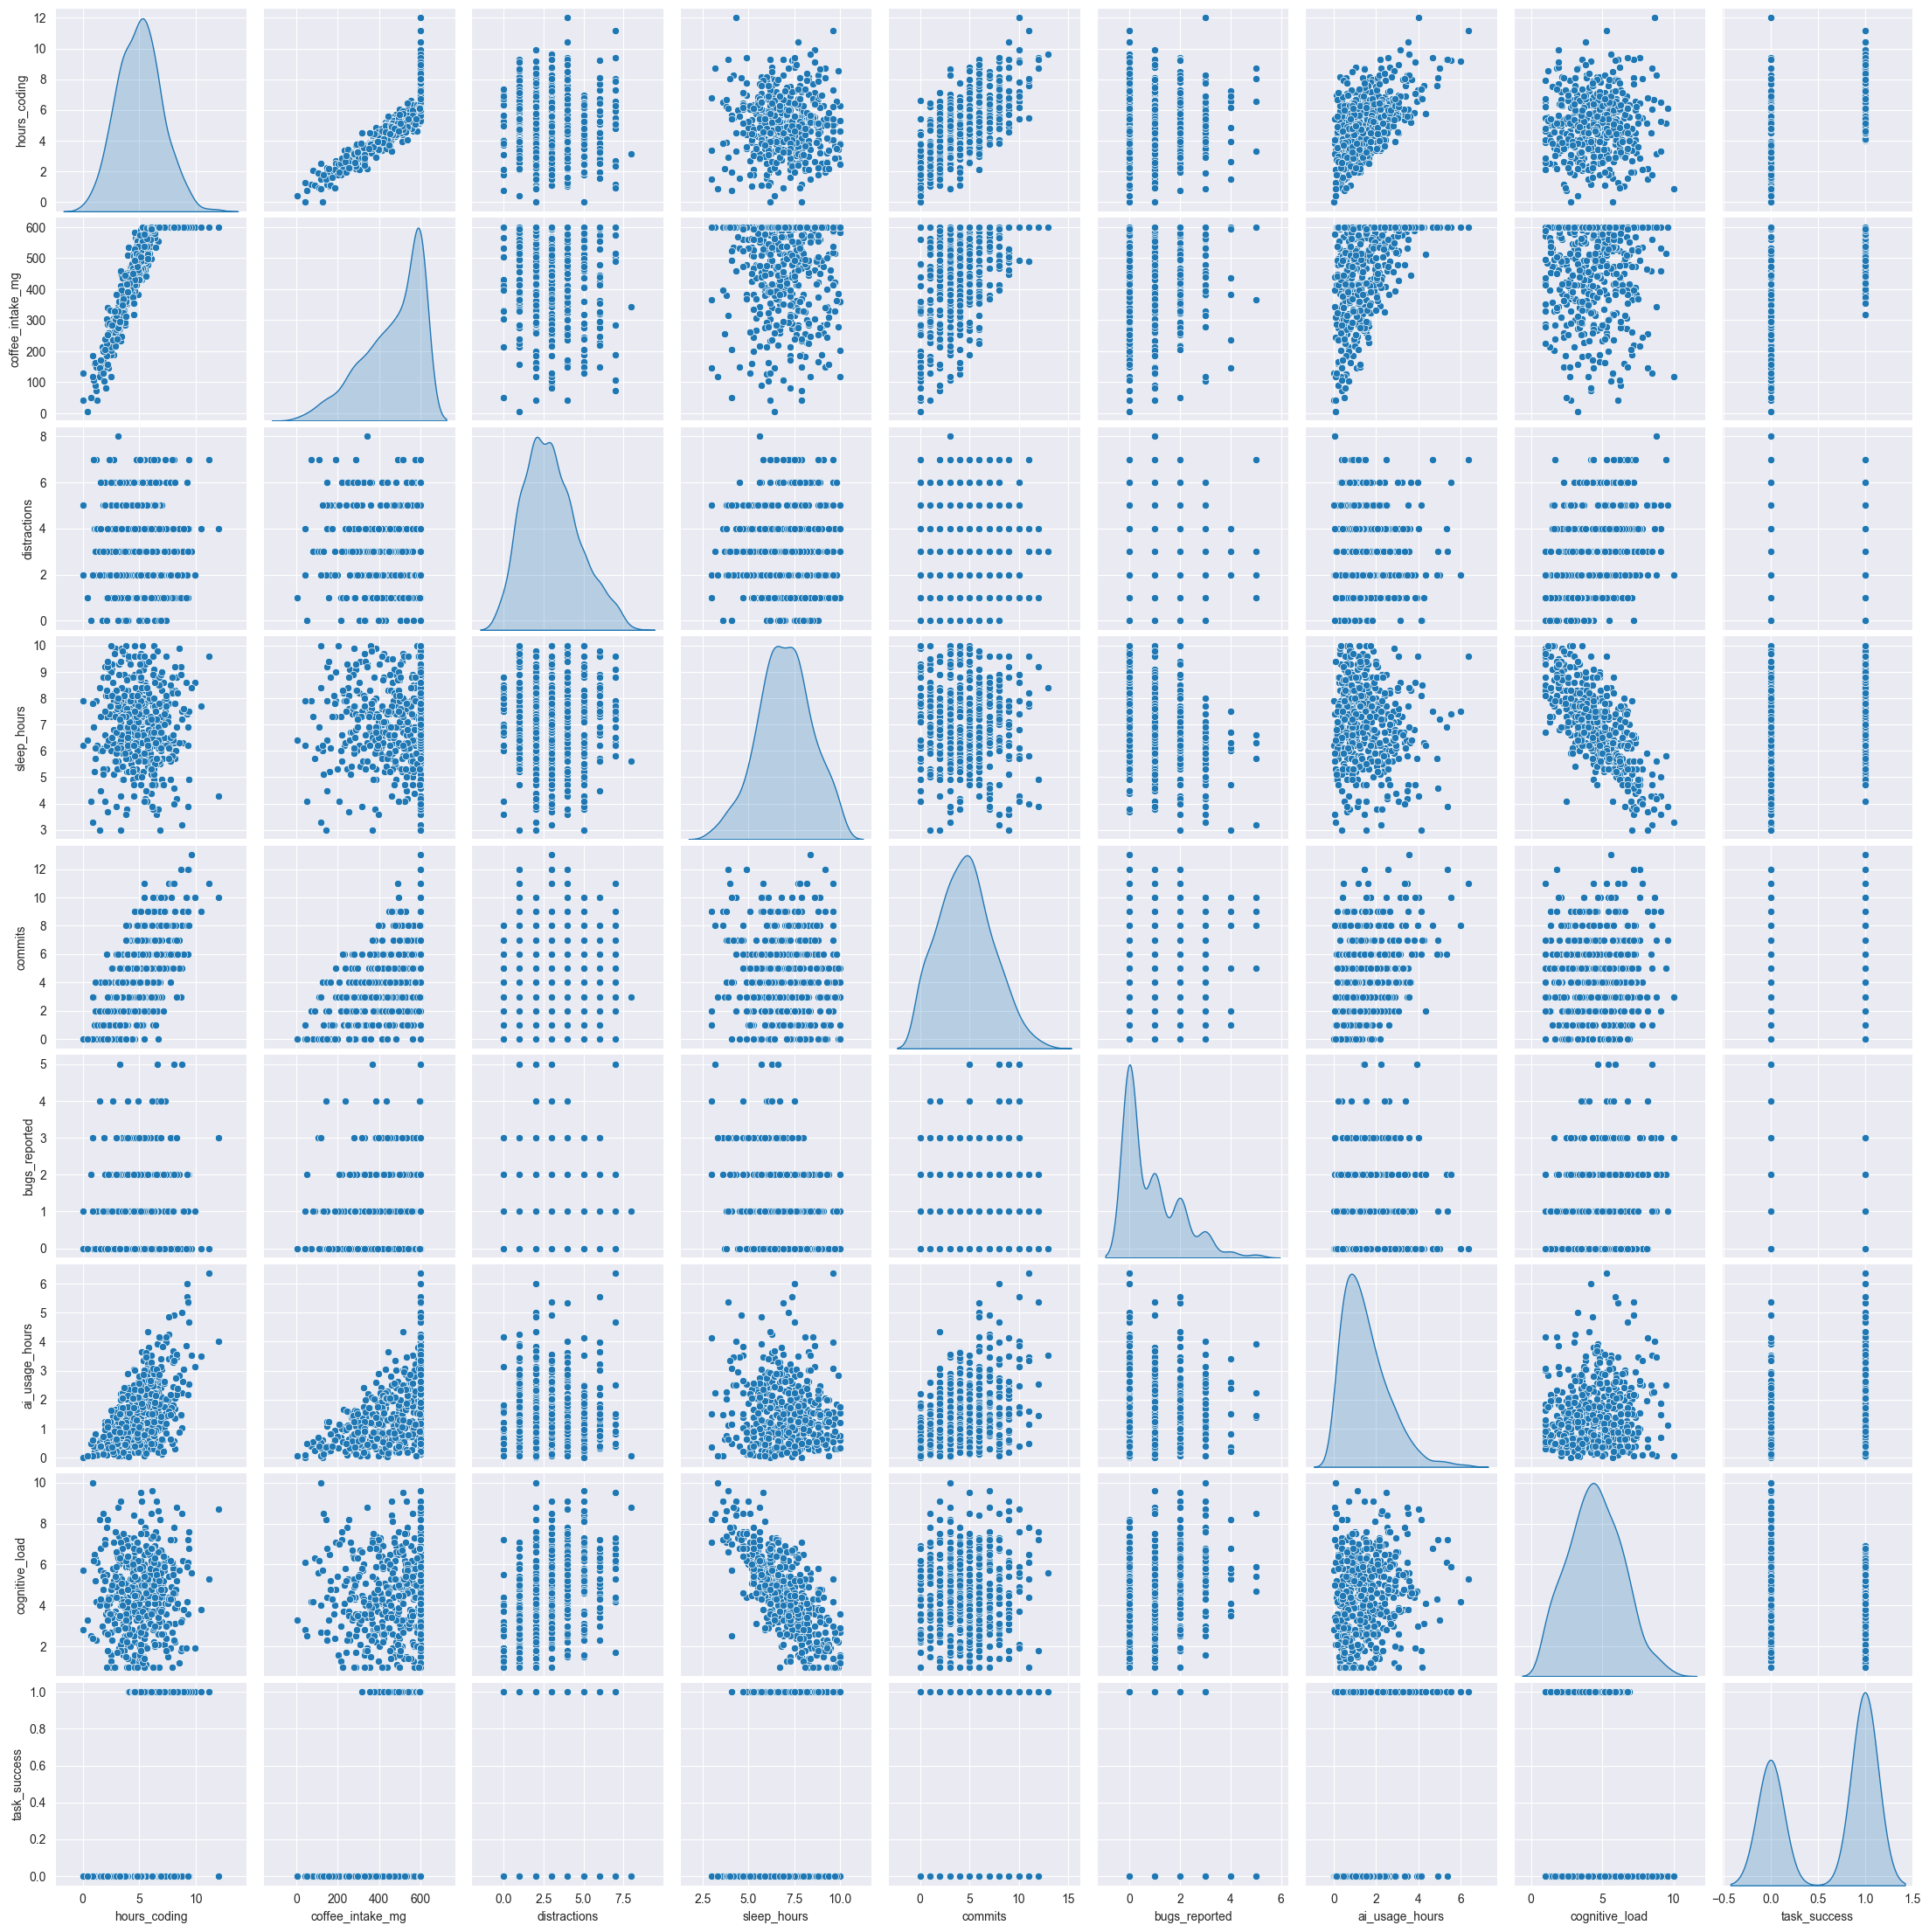

In [14]:
sns.pairplot(data, diag_kind='kde')

Text(0.5, 1.0, 'Correlation Matrix')

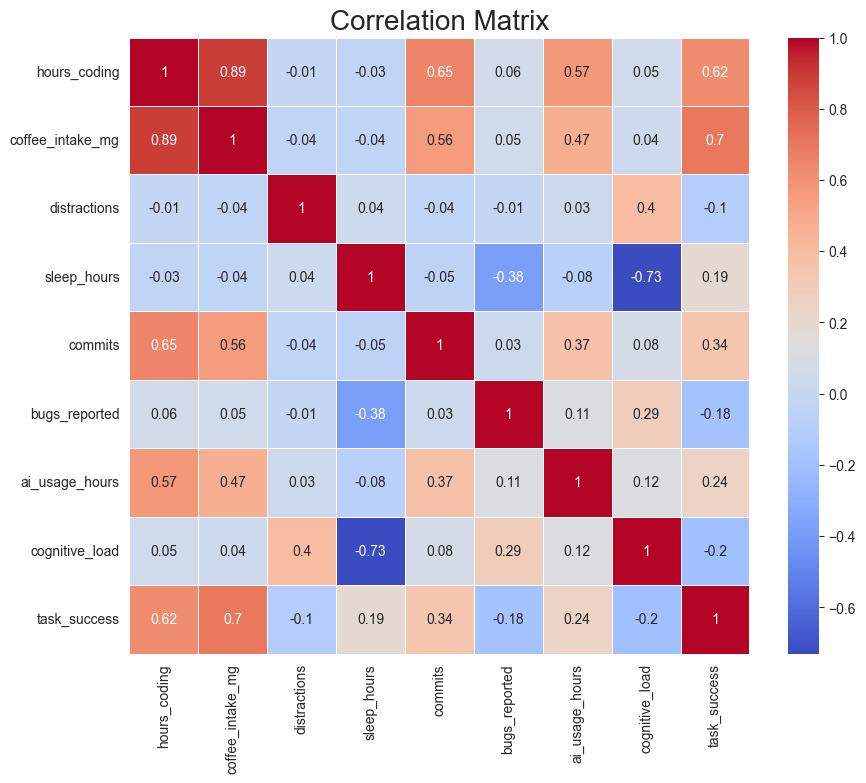

In [15]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [16]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

data.shape

(470, 9)

In [17]:
features_to_scale = [
    'hours_coding',
    'coffee_intake_mg',
    'commits',
    'cognitive_load',
    'ai_usage_hours',
    'sleep_hours'
]
X = data.drop('task_success', axis=1)
y = data['task_success']

X_processed = X.copy()
scaler = StandardScaler()
X_processed[features_to_scale] = scaler.fit_transform(X_processed[features_to_scale])
data_preprocessed = X_processed.copy()
data_preprocessed['task_success'] = y
data_preprocessed

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,0.636289,1.005695,1,-0.878350,-0.961591,1,-0.765794,0.539168,1
1,-0.082160,0.777166,2,-0.091336,0.237209,3,0.392339,0.150674,1
2,0.811659,0.720033,1,1.339598,-0.961591,0,0.971405,-1.236804,1
3,1.801648,1.005695,7,-0.520616,1.835610,5,0.002583,0.816664,0
4,-0.189645,-0.272639,6,-0.091336,-0.162391,0,-0.153320,1.038660,1
...,...,...,...,...,...,...,...,...,...
495,0.687203,0.962845,1,-1.236084,-0.561991,0,-0.543076,1.316156,1
496,-1.094778,-0.551159,2,-0.234430,-0.561991,2,-0.019689,0.816664,0
497,-0.138731,0.248692,4,0.337944,-0.961591,0,-1.099870,0.039676,1
498,-0.913751,-1.165331,6,-0.091336,-1.361191,0,0.136213,1.038660,0


In [18]:
data_preprocessed.to_csv('ai_dev_productivity_processed.csv', index=False)
print("Data yang sudah diproses telah disimpan sebagai 'ai_dev_productivity_processed.csv'")

Data yang sudah diproses telah disimpan sebagai 'ai_dev_productivity_processed.csv'


In [19]:
import joblib
joblib.dump(scaler, 'scaler_model.pkl')
print("StandardScaler telah disimpan sebagai 'scaler_model.pkl'")

StandardScaler telah disimpan sebagai 'scaler_model.pkl'
